In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive/')
train_dir='/content/drive/My Drive/cats_and_dogs_small/train/'
val_dir='/content/drive/My Drive/cats_and_dogs_small/validation/'
print(len(os.listdir(train_dir)))
print(len(os.listdir(val_dir)))

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
2
2


In [ ]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
from tensorflow import keras
from keras import optimizers
model.compile(loss='binary_crossentropy',optimizer=keras.optimizers.RMSprop(lr=1e-4),metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

validation_generator = test_datagen.flow_from_directory(val_dir,target_size=(150, 150),batch_size=20,class_mode='binary')


Found 4008 images belonging to 2 classes.
Found 1008 images belonging to 2 classes.


In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 398s 4s/step - loss: 0.6885 - acc: 0.5518 - val_loss: 0.6673 - val_acc: 0.6450
Epoch 2/30
100/100 [==============================] - 139s 1s/step - loss: 0.6582 - acc: 0.6005 - val_loss: 0.6329 - val_acc: 0.6370
Epoch 3/30
100/100 [==============================] - 120s 1s/step - loss: 0.6244 - acc: 0.6550 - val_loss: 0.5974 - val_acc: 0.6860
Epoch 4/30
100/100 [==============================] - 117s 1s/step - loss: 0.5939 - acc: 0.6810 - val_loss: 0.5574 - val_acc: 0.7150
Epoch 5/30
100/100 [==============================] - 115s 1s/step - loss: 0.5763 - acc: 0.6896 - val_loss: 0.5660 - val_acc: 0.6970
Epoch 6/30
100/100 [==============================] - 117s 1s/step - loss: 0.5541 - acc: 0.7065 - val_loss: 0.5579 - val_acc: 0.7260
Epoch 7/30
100/100 [==============================] - 115s 1s/step - loss: 0.5470 - acc: 0.7135 - val_loss: 0.5521 - val_acc: 0.7170
Epoch 8/30
100/100 [==============================] - 120s 1s/step - 

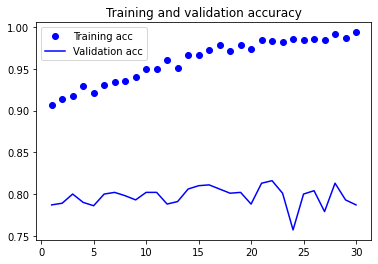

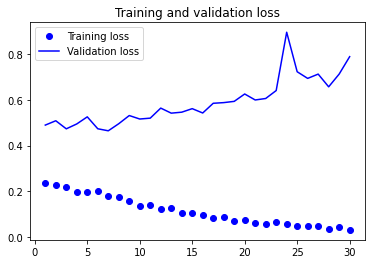

In [ ]:
import matplotlib.pyplot as plt 
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()